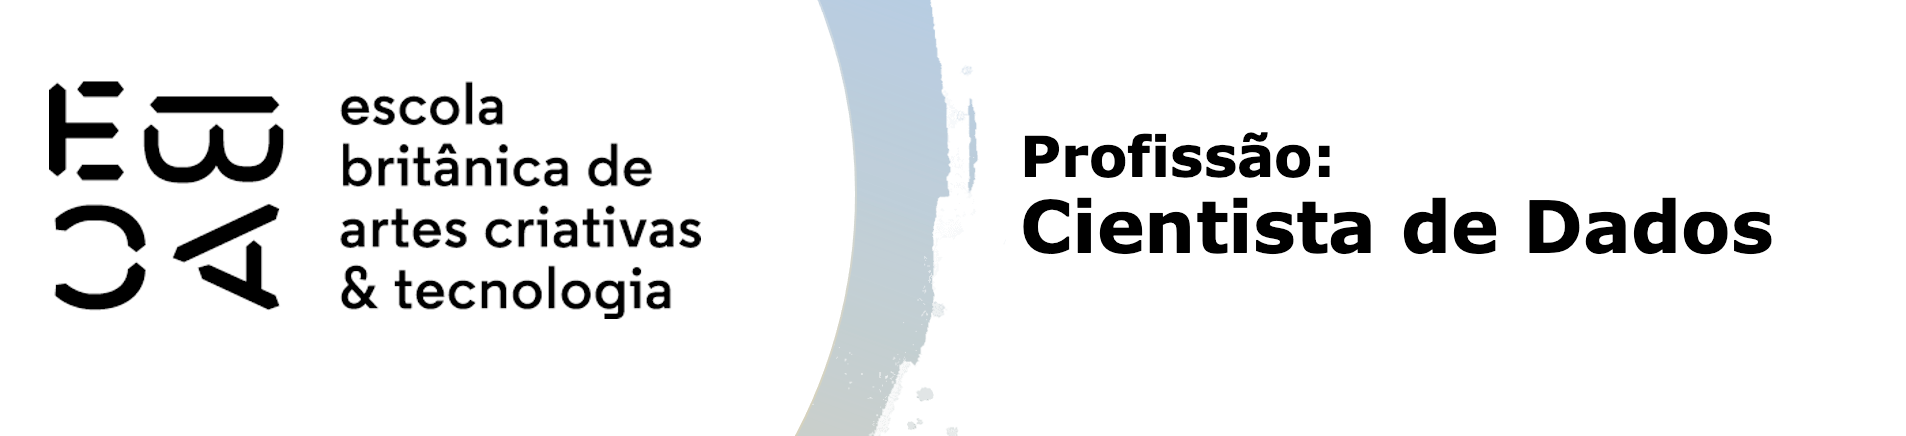

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from tqdm.notebook import tqdm
from sklearn.metrics import silhouette_score

In [45]:
df = pd.read_csv('online_shoppers_intention.csv')

In [46]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [47]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [48]:
df.duplicated().sum()

125

In [49]:
df.shape

(12330, 18)

In [50]:
df.isna().sum().sum()

0

In [51]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [52]:
df = df.iloc[:, :6].join(df[['Revenue', 'BounceRates']])

In [53]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue,BounceRates
0,0,0.0,0,0.0,1,0.000000,False,0.20
1,0,0.0,0,0.0,2,64.000000,False,0.00
2,0,0.0,0,0.0,1,0.000000,False,0.20
3,0,0.0,0,0.0,2,2.666667,False,0.05
4,0,0.0,0,0.0,10,627.500000,False,0.02


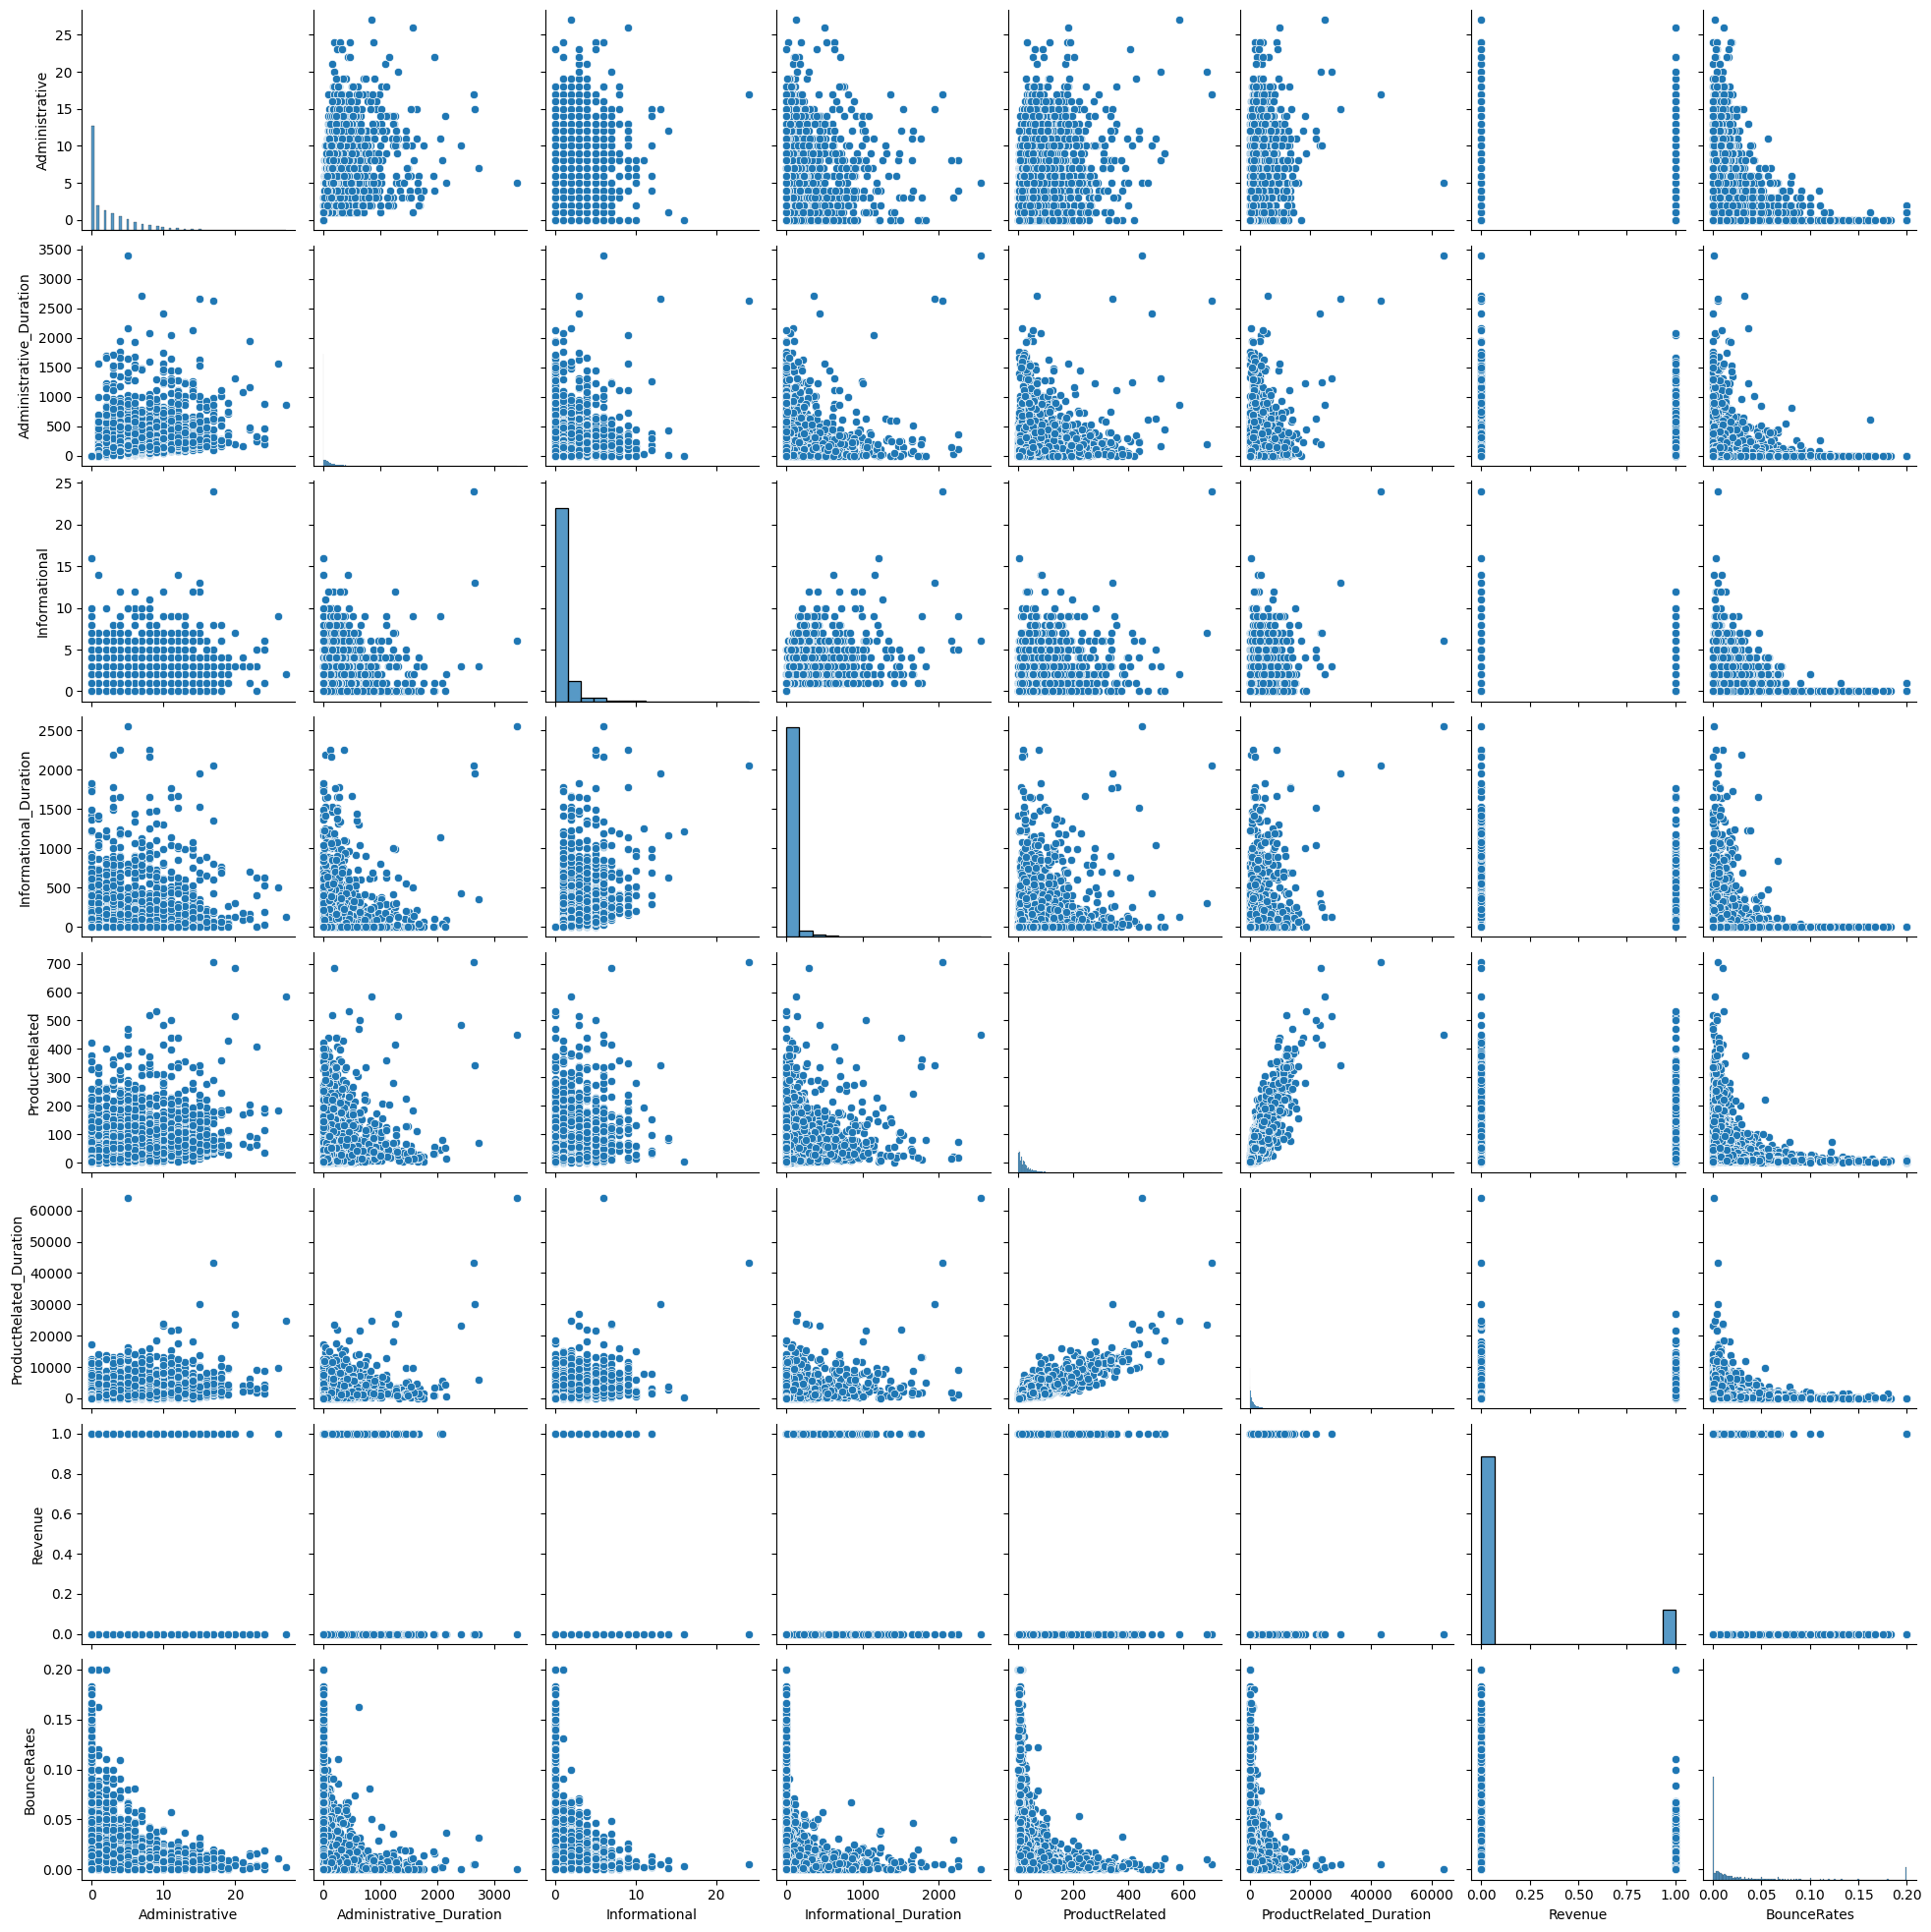

In [54]:
sns.pairplot(df)

In [55]:
padronizador = StandardScaler()
df_padronizado = padronizador.fit_transform(df)

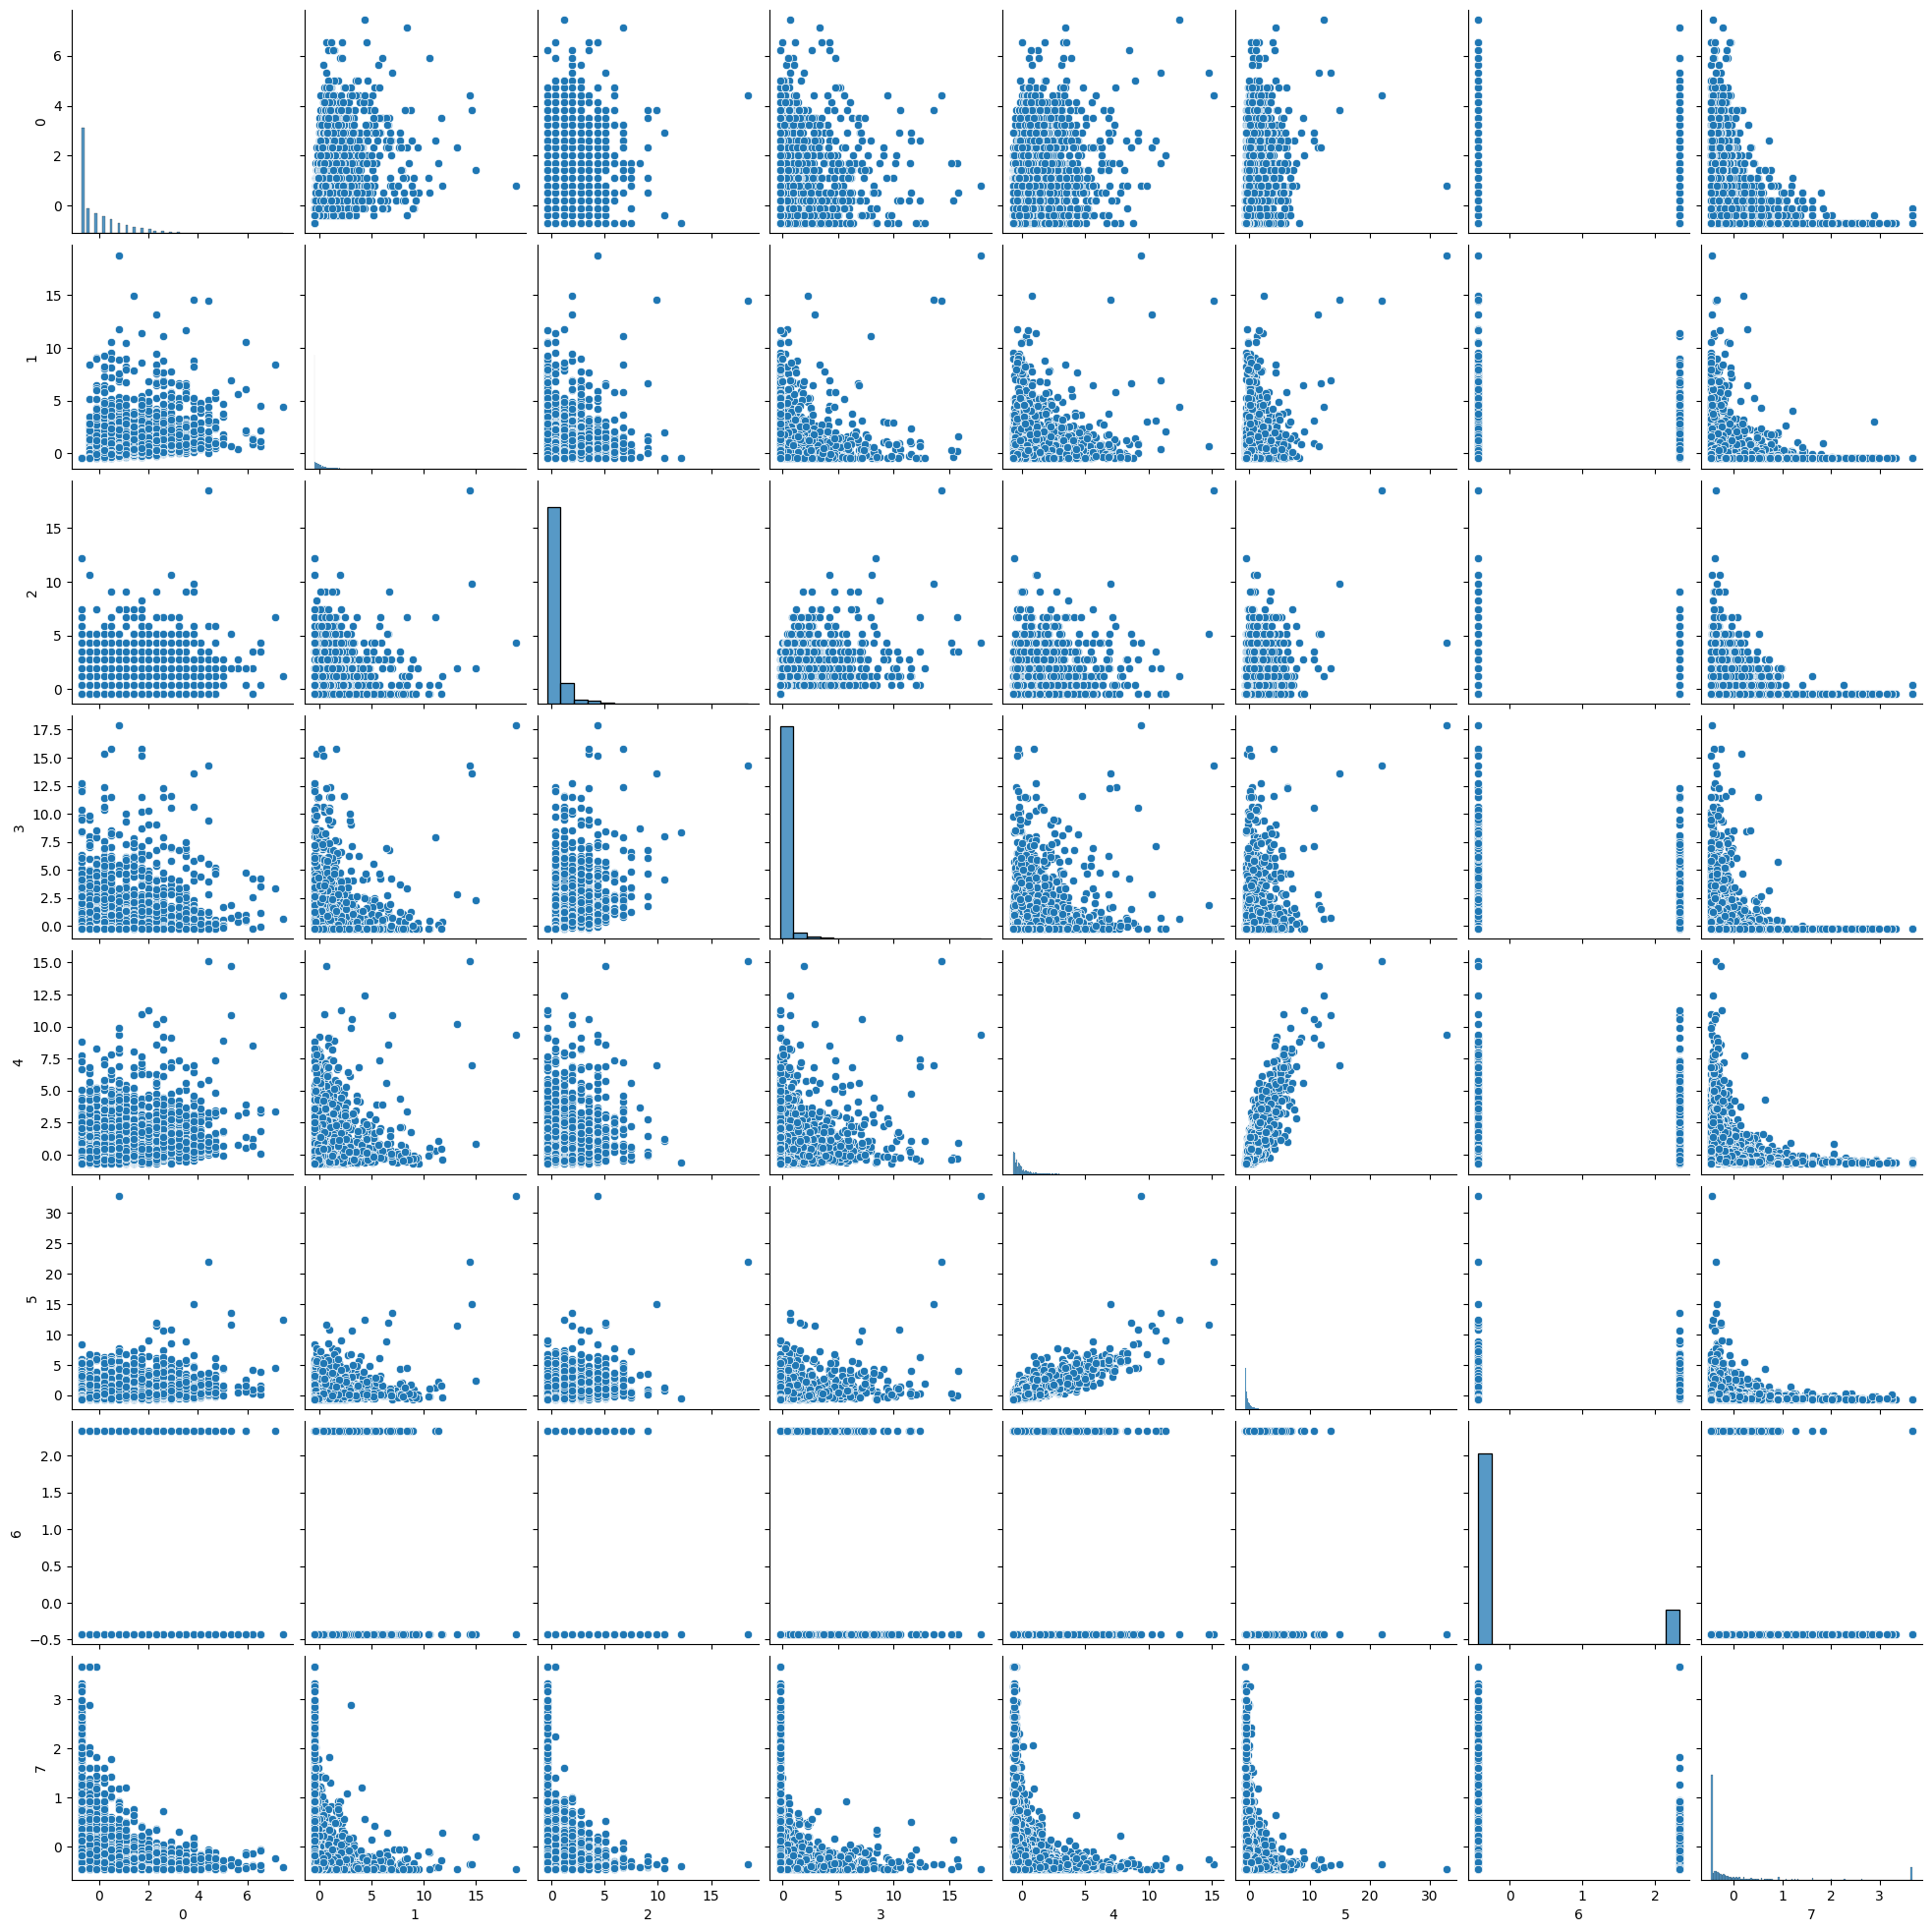

In [56]:
sns.pairplot(pd.DataFrame(df_padronizado))

---

## Número de grupos

In [57]:
# cotovelo
SQD = []
K = range(1,11)
for k in tqdm(K): # pra rodar barra de progresso
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SQD.append(km.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]

In [58]:
SQD

[45804481481.44788,
 21544692216.370567,
 13210344360.96953,
 8815116958.06909,
 6023367966.828093,
 4757823671.200672,
 3332102140.582364,
 2703384728.9219036,
 2420923364.8333044,
 1915135579.5215018]

<Axes: xlabel='num_clusters'>

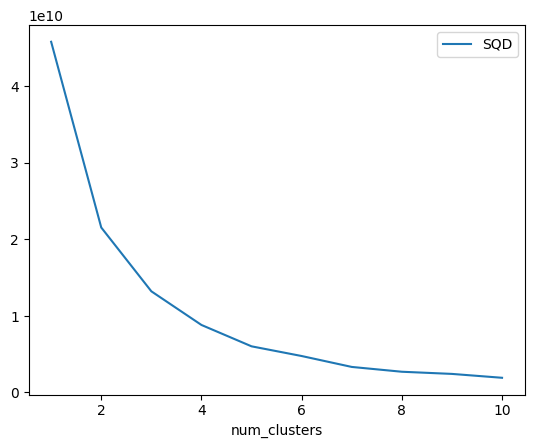

In [59]:
df_cotovelo = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_cotovelo.plot(x = 'num_clusters', y = 'SQD')

In [60]:
silhuetas = []
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters + 1)):
    #Aplica o KMeans
    km = KMeans(n_clusters=n_clusters, random_state=42).fit(df_padronizado)

    silhueta = silhouette_score(df_padronizado, km.labels_)
    silhuetas.append(silhueta)
    
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    
    df['grupos_' + str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

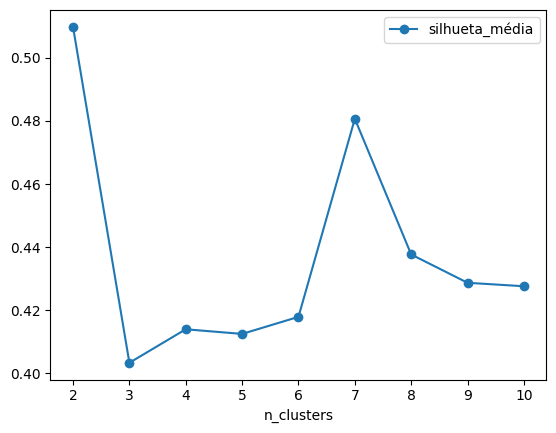

In [61]:
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_média': silhuetas})

df_silhueta.plot.line(x = 'n_clusters', y = 'silhueta_média', marker='o')

---

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [62]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'Revenue', 'BounceRates', 'grupos_2', 'grupos_3', 'grupos_4',
       'grupos_5', 'grupos_6', 'grupos_7', 'grupos_8', 'grupos_9',
       'grupos_10'],
      dtype='object')

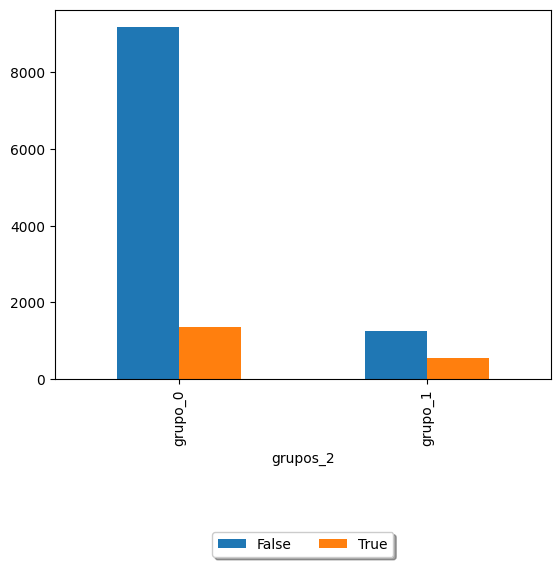

In [63]:
ax = df.groupby(['grupos_2', 'Revenue'], observed=False)['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

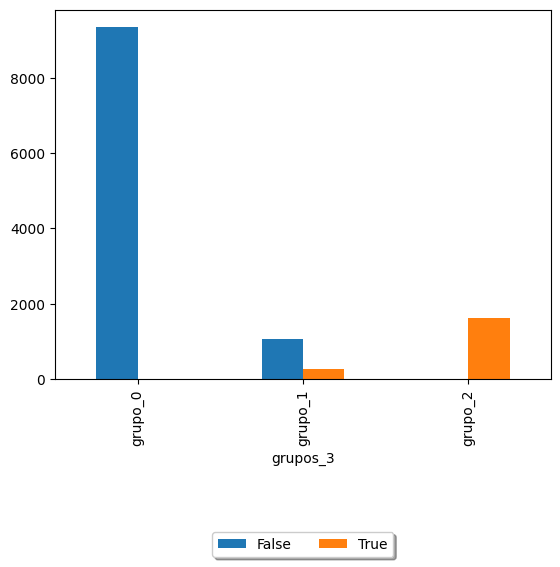

In [64]:
ax = df.groupby(['grupos_3','Revenue'], observed=False)['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?


In [65]:
resumo_grupos2 = df.groupby('grupos_2',observed=False)['Revenue'].value_counts()
resumo_grupos2

grupos_2  Revenue
grupo_0   False      9174
          True       1361
grupo_1   False      1248
          True        547
Name: count, dtype: int64

In [66]:
resumo_grupos3 = df.groupby('grupos_3',observed=False)['Revenue'].value_counts()
resumo_grupos3

grupos_3  Revenue
grupo_0   False      9346
          True          0
grupo_1   False      1076
          True        281
grupo_2   True       1627
          False         0
Name: count, dtype: int64

In [67]:
mean_grupos3 = df.groupby('grupos_3', observed=False).agg({'Revenue': 'mean', 'BounceRates': 'mean'})
mean_grupos3

,Revenue,BounceRates
grupos_3,,
grupo_0,0.000000,0.027432
grupo_1,0.207074,0.006538
grupo_2,1.000000,0.005142


In [68]:
mean_grupos2 = df.groupby('grupos_2', observed=False).agg({'Revenue': 'mean', 'BounceRates': 'mean'})
mean_grupos2

,Revenue,BounceRates
grupos_2,,
grupo_0,0.129188,0.024907
grupo_1,0.304735,0.006250


In [69]:
#grupos com 2 clusters (grupos_2)
resumo_grupos2 = df.groupby('grupos_2', observed=False)['Revenue'].value_counts().unstack()
resumo_grupos2['Total'] = resumo_grupos2.sum(axis=1)
resumo_grupos2['Propensão (%)'] = (resumo_grupos2[True] / resumo_grupos2['Total']) * 100

print("Resumo Grupos 2:")
print(resumo_grupos2[['Total', True, False, 'Propensão (%)']])

#grupos com 3 clusters (grupos_3)
resumo_grupos3 = df.groupby('grupos_3', observed=False)['Revenue'].value_counts().unstack()
resumo_grupos3['Total'] = resumo_grupos3.sum(axis=1)
resumo_grupos3['Propensão (%)'] = (resumo_grupos3[True] / resumo_grupos3['Total']) * 100

print("\nResumo Grupos 3:")
print(resumo_grupos3[['Total', True, False, 'Propensão (%)']])

Resumo Grupos 2:
Revenue   Total  True  False  Propensão (%)
grupos_2                                   
grupo_0   10535  1361   9174      12.918842
grupo_1    1795   547   1248      30.473538

Resumo Grupos 3:
Revenue   Total  True  False  Propensão (%)
grupos_3                                   
grupo_0    9346     0   9346       0.000000
grupo_1    1357   281   1076      20.707443
grupo_2    1627  1627      0     100.000000


---

### Análise

**Comparação entre 2 clusters e 3 clusters**

- Nos grupos com 2 clusters (grupos_2): O grupo_1 possui os clientes mais propensos à compra, com uma propensão de 30,47%.

- Nos grupos com 3 clusters (grupos_3): O grupo_2 é o que possui os clientes mais propensos à compra, com 100% de propensão, ou seja, todos os clientes deste grupo realizam compras.

Portanto, o grupo com maior propensão absoluta é o grupo_2 do agrupamento com 3 clusters.

In [70]:
data_grupos2 = {
    'Grupos': ['grupo_0', 'grupo_1'],
    'Propensão (%)': [12.918842, 30.473538]
}

data_grupos3 = {
    'Grupos': ['grupo_0', 'grupo_1', 'grupo_2'],
    'Propensão (%)': [0.000000, 20.707443, 100.000000]
}

df_grupos2 = pd.DataFrame(data_grupos2)
df_grupos3 = pd.DataFrame(data_grupos3)

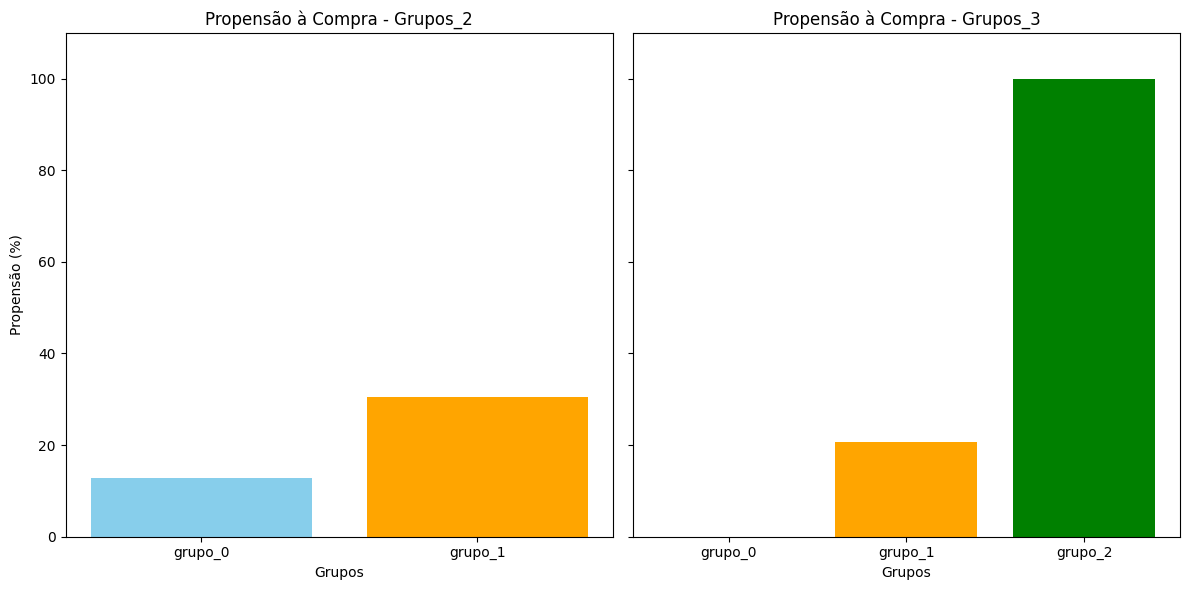

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].bar(df_grupos2['Grupos'], df_grupos2['Propensão (%)'], color=['skyblue', 'orange'])
axes[0].set_title('Propensão à Compra - Grupos_2')
axes[0].set_ylabel('Propensão (%)')
axes[0].set_ylim(0, 110)  # Para alinhar com grupos_3
axes[0].set_xlabel('Grupos')

axes[1].bar(df_grupos3['Grupos'], df_grupos3['Propensão (%)'], color=['skyblue', 'orange', 'green'])
axes[1].set_title('Propensão à Compra - Grupos_3')
axes[1].set_xlabel('Grupos')

plt.tight_layout()
plt.show()